In [43]:
import pandas as pd
import numpy as np

import os
import datetime

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

from skimage import color, exposure

from sklearn.metrics import accuracy_score
%load_ext tensorboard

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [60]:
cd '/content/drive/My Drive/Colab Notebooks/matrix/matrix_three/dw_matrix_road_sign'

/content/drive/My Drive/Colab Notebooks/matrix/matrix_three/dw_matrix_road_sign


In [70]:
ls data

signnames.csv  test2.p  test.p  train.p  train.pl


In [65]:
!curl -L http://bit.ly/test_road_sign -o test.p

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   140  100   140    0     0   2978      0 --:--:-- --:--:-- --:--:--  3043
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100 12.9M  100 12.9M    0     0  8267k      0  0:00:01  0:00:01 --:--:-- 13.8M


In [0]:
train = pd.read_pickle('data/train.p')
tests = pd.read_pickle('data/test.p')

In [90]:
X_train, y_train = train['features'], train['labels']
X_test, y_test = tests['features'], tests['labels']
X_train.shape, y_train.shape

((34799, 32, 32, 3), (34799,))

In [91]:
X_test.shape, y_test.shape

((4410, 32, 32, 3), (4410,))

In [0]:
if y_train.ndim == 1: y_train = to_categorical(y_train)
if y_test.ndim == 1: y_test = to_categorical(y_test)

In [0]:
input_shape = X_train.shape[1:]
num_classes = y_train.shape[1]

In [0]:
model = Sequential ([
  Conv2D(filters= 64, kernel_size=(3,3), activation = 'relu', input_shape=input_shape),
  
  Flatten(),
 
  Dense(num_classes, activation = 'softmax'),
])

#model.summary()

In [0]:
model.compile(loss='categorical_crossentropy', optimizer= 'Adam', metrics=['accuracy'])

In [96]:
model.fit(X_train,y_train)

1088/1088 [==============================] - 3s 3ms/step - loss: 6.6131 - accuracy: 0.8018


In [0]:
def get_cnn_v1(input_shape,num_classes):
  return Sequential ([
    Conv2D(filters= 64, kernel_size=(3,3), activation = 'relu', input_shape=input_shape),
  
    Flatten(),
 
    Dense(num_classes, activation = 'softmax'),
  ])

In [0]:
def train_model(model, X_train,y_train, params_fit={}):
  model.compile(loss='categorical_crossentropy', optimizer= 'Adam', metrics=['accuracy'])
  #logir sciezka do katalogu z logami
  logdir= os.path.join("logs", datetime.datetime.now().strftime("%Y%m%d=%H%M%S"))
  tensorboard_callback = tf.keras.callbacks.TensorBoard(logdir,histogram_freq=1)

  model.fit(
      X_train,
      y_train,
      batch_size = params_fit.get('batch_size',128), #podzial na paczki
      epochs = params_fit.get('epochs',5), #liczba iteracji dla paczek
      verbose = params_fit.get('verbose',1), #widocznosc stanu
      validation_data=params_fit.get('validation_data',(X_train,y_train)), # wizualizacja
      callbacks=[tensorboard_callback]
  )
  return model

In [102]:
model = get_cnn_v1(input_shape,num_classes)
model_trained = train_model(model, X_train,y_train)

Epoch 1/5
272/272 [==============================] - 2s 9ms/step - loss: 31.1172 - accuracy: 0.7210 - val_loss: 0.1934 - val_accuracy: 0.9546
Epoch 2/5
272/272 [==============================] - 2s 9ms/step - loss: 0.2035 - accuracy: 0.9526 - val_loss: 0.1894 - val_accuracy: 0.9534
Epoch 3/5
272/272 [==============================] - 2s 9ms/step - loss: 0.1241 - accuracy: 0.9715 - val_loss: 0.1105 - val_accuracy: 0.9786
Epoch 4/5
272/272 [==============================] - 2s 9ms/step - loss: 0.1063 - accuracy: 0.9757 - val_loss: 0.1001 - val_accuracy: 0.9812
Epoch 5/5
272/272 [==============================] - 2s 9ms/step - loss: 0.0799 - accuracy: 0.9819 - val_loss: 0.1336 - val_accuracy: 0.9692


In [84]:
y_pred_prob = model_trained.predict(X_test)
y_pred_prob

array([[2.5630924e-13, 2.6548209e-04, 6.6886295e-04, ..., 4.8156729e-04,
        5.5539382e-05, 2.9038647e-06],
       [2.3385516e-14, 5.9595019e-05, 1.2178811e-03, ..., 1.9673759e-04,
        7.5449876e-08, 8.0894932e-07],
       [4.9491943e-13, 6.2154158e-04, 2.0887787e-04, ..., 6.4143224e-04,
        9.2512579e-04, 5.3305971e-06],
       ...,
       [3.4884069e-04, 1.2889395e-02, 3.3825959e-04, ..., 2.5688484e-04,
        2.0711379e-04, 3.6882342e-05],
       [1.4624050e-03, 1.6896375e-02, 9.7252690e-04, ..., 1.3229992e-03,
        4.6880578e-04, 1.7342390e-04],
       [9.1347058e-05, 8.7434854e-03, 1.1027221e-03, ..., 6.3225307e-04,
        7.0356546e-05, 3.6264933e-05]], dtype=float32)

In [36]:
y_pred_prob[400] # returns probablility for each sign class

array([4.1501229e-09, 9.8095119e-01, 1.1805844e-02, 1.4189880e-12,
       7.2424910e-03, 4.2803970e-07, 6.4537140e-11, 1.0998347e-09,
       2.8262117e-16, 1.5083752e-11, 3.2870143e-17, 1.1214367e-21,
       1.8621962e-19, 3.7210943e-18, 4.3182555e-19, 4.0540948e-16,
       8.9011906e-15, 3.5766103e-22, 4.6840329e-16, 1.8734430e-23,
       4.7572903e-30, 2.2196327e-22, 2.7991643e-30, 5.9698954e-22,
       7.7431550e-19, 1.4737075e-13, 5.5867779e-23, 1.7348536e-31,
       2.9361254e-18, 9.7017190e-20, 3.7885333e-30, 4.3183967e-15,
       5.2795676e-19, 4.4344893e-28, 1.9417286e-31, 4.6603525e-21,
       3.8870424e-29, 0.0000000e+00, 2.5846540e-34, 0.0000000e+00,
       9.9222128e-34, 2.3494250e-27, 1.1977728e-21], dtype=float32)

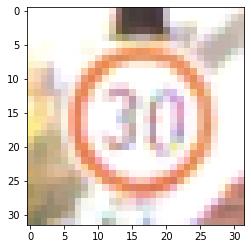

In [25]:
plt.imshow(X_test[400])

In [30]:
ls data

signnames.csv  test.p  train.p  train.pl


In [103]:
df = pd.read_csv('data/signnames.csv')
df.head()

,a,b
0,0,Speed limit (20km/h)
1,1,Speed limit (30km/h)
2,2,Speed limit (50km/h)
3,3,Speed limit (60km/h)
4,4,Speed limit (70km/h)


In [0]:
labels_dict = df.to_dict()['b']

In [35]:
labels_dict[np.argmax(y_pred_prob[400])] #returns index argmax of item with max result

'Speed limit (30km/h)'

In [37]:
np.sum([4.1501229e-09, 9.8095119e-01, 1.1805844e-02, 1.4189880e-12,
       7.2424910e-03, 4.2803970e-07, 6.4537140e-11, 1.0998347e-09,
       2.8262117e-16, 1.5083752e-11, 3.2870143e-17, 1.1214367e-21,
       1.8621962e-19, 3.7210943e-18, 4.3182555e-19, 4.0540948e-16,
       8.9011906e-15, 3.5766103e-22, 4.6840329e-16, 1.8734430e-23,
       4.7572903e-30, 2.2196327e-22, 2.7991643e-30, 5.9698954e-22,
       7.7431550e-19, 1.4737075e-13, 5.5867779e-23, 1.7348536e-31,
       2.9361254e-18, 9.7017190e-20, 3.7885333e-30, 4.3183967e-15,
       5.2795676e-19, 4.4344893e-28, 1.9417286e-31, 4.6603525e-21,
       3.8870424e-29, 0.0000000e+00, 2.5846540e-34, 0.0000000e+00,
       9.9222128e-34, 2.3494250e-27, 1.1977728e-21])

0.9999999583708592

In [0]:
#0.9999999583708592 close to 1

<BarContainer object of 43 artists>

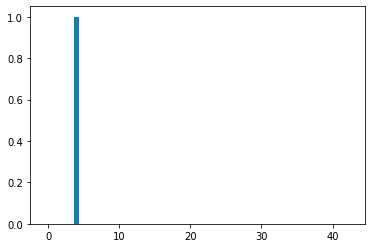

In [104]:
plt.bar(range(43),y_pred_prob[400]) # to show which class wins 

In [39]:
labels_dict[1]

'Speed limit (30km/h)'

In [0]:
def predict(model_trained, X_test, y_test, scorong= accuracy_score):
  
  y_test_norm = np.argmax(y_test, axis=1)
  
  y_pred_prob = model_trained.predict(X_test)
  y_pred = np.argmax(y_pred_prob,axis=1) # axis=1  needed to find the max prob for each sign not for whole set

 
  return scorong(y_test_norm,y_pred)

In [106]:
predict(model_trained, X_test, y_test)

0.8195011337868481

In [0]:
def get_cnn_v2(input_shape,num_classes):
  return Sequential ([
    Conv2D(filters= 32, kernel_size=(3,3), activation = 'relu', input_shape=input_shape),
    MaxPool2D(),
    Dropout(0.5),

    Conv2D(filters= 64, kernel_size=(3,3), activation = 'relu' ),
    MaxPool2D(),
    Dropout(0.5),

    Flatten(),
 
    Dense(1024, activation = 'relu'),
    Dropout(0.3),

    Dense(num_classes, activation = 'softmax'),
  ])

In [0]:
model = get_cnn_v2(input_shape,num_classes)

In [0]:
def train_and_predict(model):
  model_trained = train_model(model, X_train,y_train)
  return predict(model_trained, X_test, y_test)

In [110]:
train_and_predict(model)


Epoch 1/5
272/272 [==============================] - 3s 10ms/step - loss: 8.8947 - accuracy: 0.1249 - val_loss: 2.7907 - val_accuracy: 0.2973
Epoch 2/5
272/272 [==============================] - 2s 9ms/step - loss: 2.5448 - accuracy: 0.3018 - val_loss: 1.7667 - val_accuracy: 0.5096
Epoch 3/5
272/272 [==============================] - 2s 9ms/step - loss: 1.8341 - accuracy: 0.4574 - val_loss: 1.0776 - val_accuracy: 0.7023
Epoch 4/5
272/272 [==============================] - 2s 9ms/step - loss: 1.2815 - accuracy: 0.6058 - val_loss: 0.7088 - val_accuracy: 0.8034
Epoch 5/5
272/272 [==============================] - 2s 9ms/step - loss: 0.9683 - accuracy: 0.6977 - val_loss: 0.4363 - val_accuracy: 0.8730


0.7845804988662132

In [0]:
def get_cnn_v3(input_shape,num_classes):
  return Sequential ([
    Conv2D(filters= 32, kernel_size=(3,3), activation = 'relu', input_shape=input_shape),
    Conv2D(filters= 32, kernel_size=(3,3), activation = 'relu' ),
    MaxPool2D(),
    Dropout(0.5),

    Conv2D(filters= 64, kernel_size=(3,3), activation = 'relu' ),
    Conv2D(filters= 64, kernel_size=(3,3), activation = 'relu' ),
    MaxPool2D(),
    Dropout(0.5),

    Flatten(),
 
    Dense(1024, activation = 'relu'),
    Dropout(0.3),

    Dense(num_classes, activation = 'softmax'),
  ])

In [0]:
model = get_cnn_v3(input_shape,num_classes)

In [113]:
train_and_predict(model)


Epoch 1/5
272/272 [==============================] - 3s 12ms/step - loss: 3.5200 - accuracy: 0.2925 - val_loss: 1.2146 - val_accuracy: 0.6997
Epoch 2/5
272/272 [==============================] - 3s 11ms/step - loss: 1.2774 - accuracy: 0.6120 - val_loss: 0.5227 - val_accuracy: 0.8583
Epoch 3/5
272/272 [==============================] - 3s 11ms/step - loss: 0.7861 - accuracy: 0.7549 - val_loss: 0.2638 - val_accuracy: 0.9364
Epoch 4/5
272/272 [==============================] - 3s 11ms/step - loss: 0.5496 - accuracy: 0.8278 - val_loss: 0.1816 - val_accuracy: 0.9480
Epoch 5/5
272/272 [==============================] - 3s 11ms/step - loss: 0.4026 - accuracy: 0.8741 - val_loss: 0.1226 - val_accuracy: 0.9679


0.9253968253968254

In [0]:
def get_cnn_v4(input_shape,num_classes):
  return Sequential ([
    Conv2D(filters= 32, kernel_size=(3,3), activation = 'relu', input_shape=input_shape),
    Conv2D(filters= 32, kernel_size=(3,3), activation = 'relu',padding='same' ),
    MaxPool2D(),
    Dropout(0.3),

    Conv2D(filters= 64, kernel_size=(3,3), activation = 'relu' ,padding='same'),
    Conv2D(filters= 64, kernel_size=(3,3), activation = 'relu' ),
    MaxPool2D(),
    Dropout(0.3),

    Conv2D(filters= 64, kernel_size=(3,3), activation = 'relu' ,padding='same'),
    Conv2D(filters= 64, kernel_size=(3,3), activation = 'relu' ),
    MaxPool2D(),
    Dropout(0.3),

    Flatten(),
 
    Dense(1024, activation = 'relu'),
    Dropout(0.3),

    Dense(num_classes, activation = 'softmax'),
  ])

In [119]:
get_cnn_v4(input_shape,num_classes).summary()

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_26 (Conv2D)           (None, 30, 30, 32)        896       
_________________________________________________________________
conv2d_27 (Conv2D)           (None, 30, 30, 32)        9248      
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 15, 15, 32)        0         
_________________________________________________________________
dropout_14 (Dropout)         (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_28 (Conv2D)           (None, 15, 15, 64)        18496     
_________________________________________________________________
conv2d_29 (Conv2D)           (None, 13, 13, 64)        36928     
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 6, 6, 64)        

In [0]:
model = get_cnn_v4(input_shape,num_classes)

In [121]:
train_and_predict(model)

Epoch 1/5
272/272 [==============================] - 4s 13ms/step - loss: 2.8850 - accuracy: 0.2399 - val_loss: 1.0974 - val_accuracy: 0.6960
Epoch 2/5
272/272 [==============================] - 3s 12ms/step - loss: 0.9900 - accuracy: 0.6984 - val_loss: 0.2915 - val_accuracy: 0.9035
Epoch 3/5
272/272 [==============================] - 3s 13ms/step - loss: 0.4888 - accuracy: 0.8464 - val_loss: 0.1439 - val_accuracy: 0.9630
Epoch 4/5
272/272 [==============================] - 3s 13ms/step - loss: 0.2876 - accuracy: 0.9114 - val_loss: 0.0539 - val_accuracy: 0.9836
Epoch 5/5
272/272 [==============================] - 3s 12ms/step - loss: 0.2058 - accuracy: 0.9369 - val_loss: 0.0413 - val_accuracy: 0.9871


0.9653061224489796

In [0]:
def get_cnn_v5(input_shape,num_classes):
  return Sequential ([
    Conv2D(filters= 32, kernel_size=(3,3), activation = 'relu', input_shape=input_shape),
    Conv2D(filters= 32, kernel_size=(3,3), activation = 'relu',padding='same' ),
    MaxPool2D(),
    Dropout(0.3),

    Conv2D(filters= 64, kernel_size=(3,3), activation = 'relu' ,padding='same'),
    Conv2D(filters= 64, kernel_size=(3,3), activation = 'relu' ),
    MaxPool2D(),
    Dropout(0.3),

    Conv2D(filters= 64, kernel_size=(3,3), activation = 'relu' ,padding='same'),
    Conv2D(filters= 64, kernel_size=(3,3), activation = 'relu' ),
    MaxPool2D(),
    Dropout(0.3),

    Flatten(),
 
    Dense(1024, activation = 'relu'),
    Dropout(0.3),

    Dense(1024, activation = 'relu'),
    Dropout(0.3),

    Dense(num_classes, activation = 'softmax'),
  ])

In [0]:
model = get_cnn_v5(input_shape,num_classes)

In [124]:
train_and_predict(model)

Epoch 1/5
272/272 [==============================] - 4s 15ms/step - loss: 2.5436 - accuracy: 0.2946 - val_loss: 0.9928 - val_accuracy: 0.6800
Epoch 2/5
272/272 [==============================] - 4s 14ms/step - loss: 0.8063 - accuracy: 0.7423 - val_loss: 0.2720 - val_accuracy: 0.9196
Epoch 3/5
272/272 [==============================] - 4s 13ms/step - loss: 0.3707 - accuracy: 0.8850 - val_loss: 0.0794 - val_accuracy: 0.9762
Epoch 4/5
272/272 [==============================] - 4s 13ms/step - loss: 0.2366 - accuracy: 0.9297 - val_loss: 0.0556 - val_accuracy: 0.9839
Epoch 5/5
272/272 [==============================] - 4s 13ms/step - loss: 0.1705 - accuracy: 0.9501 - val_loss: 0.0338 - val_accuracy: 0.9918


0.9693877551020408

In [125]:
X_train[0].shape #number of channels, required to have instead of 3 channels 1to monochrome

(32, 32, 3)

In [126]:
color.rgb2gray(X_train[0]).shape #channel 1 is not visible on shape (32, 32)

(32, 32)

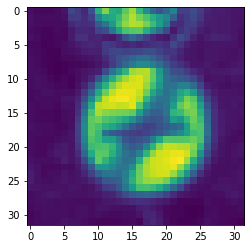

In [128]:
plt.imshow(color.rgb2gray(X_train[0]))

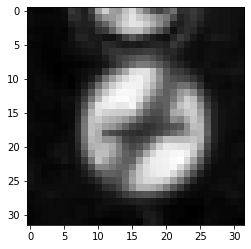

In [129]:
plt.imshow(color.rgb2gray(X_train[0]),cmap=plt.get_cmap('gray'))

In [130]:
color.rgb2gray(X_train).shape

(34799, 32, 32)

In [131]:
color.rgb2gray(X_test).shape

(4410, 32, 32)

In [0]:
X_train_gray = color.rgb2gray(X_train).reshape(-1,32,32,1)
X_test_gray = color.rgb2gray(X_test).reshape(-1,32,32,1)

In [0]:
input_shape = (32,32,1)

In [145]:
X_train_gray.reshape(-1,32,32,1).shape #-1 if you want library to calculate 1st number for you 34799

(34799, 32, 32, 1)

ERROR! Session/line number was not unique in database. History logging moved to new session 59


In [0]:
#X_train_gray.reshape(-1,32,32,1)

In [0]:
model = get_cnn_v5(input_shape,num_classes)

In [0]:
#model.compile(loss='categorical_crossentropy', optimizer= 'Adam', metrics=['accuracy'])

In [149]:
#model_trained = train_model(model, X_train,y_train)
model_trained = train_model(model, X_train_gray,y_train)

Epoch 1/5
272/272 [==============================] - 4s 14ms/step - loss: 2.7502 - accuracy: 0.2352 - val_loss: 0.8777 - val_accuracy: 0.7060
Epoch 2/5
272/272 [==============================] - 4s 13ms/step - loss: 0.7005 - accuracy: 0.7690 - val_loss: 0.1843 - val_accuracy: 0.9468
Epoch 3/5
272/272 [==============================] - 4s 13ms/step - loss: 0.3248 - accuracy: 0.8959 - val_loss: 0.0855 - val_accuracy: 0.9740
Epoch 4/5
272/272 [==============================] - 4s 13ms/step - loss: 0.2127 - accuracy: 0.9334 - val_loss: 0.0496 - val_accuracy: 0.9853
Epoch 5/5
272/272 [==============================] - 4s 14ms/step - loss: 0.1508 - accuracy: 0.9522 - val_loss: 0.0533 - val_accuracy: 0.9825


In [150]:
#predict(model_trained, X_test, y_test, scorong= accuracy_score)
predict(model_trained, X_test_gray, y_test )

0.9562358276643991

In [0]:
#model.train()

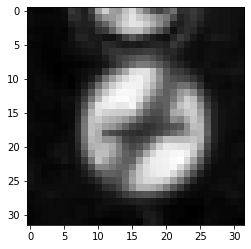

In [151]:
plt.imshow(color.rgb2gray(X_train[0]),cmap=plt.get_cmap('gray'))

In [0]:
def preproc_img(img):
  hsv=color.rgb2hsv(img)
  hsv[:,:,2] = exposure.equalize_adapthist(hsv[:,:,2])
  img = color.hsv2rgb(hsv)

  return img

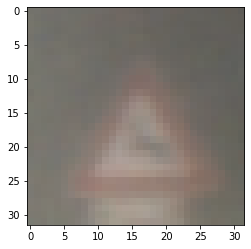

In [153]:
plt.imshow(X_train[400])

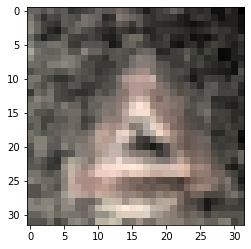

In [154]:
plt.imshow(preproc_img(X_train[400]))

In [0]:
#bit.lu/tr_day4